<a href="https://colab.research.google.com/github/priyadarsh99/MachineLearning-Projects/blob/main/ML_Automobile_Project_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automobile Dataset

# Problem: We have to contruct a Linear Model that explains the relationship of a car's mileage with respect to it's other Attributes.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#importing the necessary libraries

Loading Dataset

In [2]:
car_df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/auto-mpg.csv')

#loading the dataset using the 'read_csv' command

In [3]:
car_df.shape

(398, 9)

In [4]:
car_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
car_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
car_df.dtypes
#horsepower column has dtype 'object' which means there is something wrong

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
car_df.sample(10)
#horsepower column has a missing value

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
162,15.0,6,258.0,110,3730,19.0,75,1,amc matador
285,17.0,8,305.0,130,3840,15.4,79,1,chevrolet caprice classic
346,32.3,4,97.0,67,2065,17.8,81,3,subaru
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
372,27.0,4,151.0,90,2735,18.0,82,1,pontiac phoenix
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
148,26.0,4,116.0,75,2246,14.0,74,2,fiat 124 tc
83,28.0,4,98.0,80,2164,15.0,72,1,dodge colt (sw)
265,17.5,8,318.0,140,4080,13.7,78,1,dodge magnum xe
231,15.5,8,400.0,190,4325,12.2,77,1,chrysler cordoba


In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
car_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
car_df = car_df.drop('car name', axis = 1)
#dropping those columns which are not needed

In [12]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
car_df['origin'] = car_df['origin'].replace({1:'America',2:'Europe',3:'Asia'})
#converting the values of the origin column to their respective continent names

In [15]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
375,36.0,4,105.0,74,1980,15.3,82,Europe
39,14.0,8,400.0,175,4464,11.5,71,America
207,20.0,4,130.0,102,3150,15.7,76,Europe
184,25.0,4,140.0,92,2572,14.9,76,America
9,15.0,8,390.0,190,3850,8.5,70,America
248,36.1,4,91.0,60,1800,16.4,78,Asia
47,19.0,6,250.0,100,3282,15.0,71,America
194,22.5,6,232.0,90,3085,17.6,76,America
294,34.1,4,86.0,65,1975,15.2,79,Asia
55,27.0,4,97.0,60,1834,19.0,71,Europe


In [17]:
car_df = pd.get_dummies(car_df,columns=['origin'])
#using one-hot encoding 

In [18]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
309,41.5,4,98.0,76,2144,14.7,80,0,0,1
361,25.4,6,168.0,116,2900,12.6,81,0,1,0
346,32.3,4,97.0,67,2065,17.8,81,0,1,0
368,27.0,4,112.0,88,2640,18.6,82,1,0,0
69,12.0,8,350.0,160,4456,13.5,72,1,0,0
24,21.0,6,199.0,90,2648,15.0,70,1,0,0
285,17.0,8,305.0,130,3840,15.4,79,1,0,0
198,33.0,4,91.0,53,1795,17.4,76,0,1,0
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
196,24.5,4,98.0,60,2164,22.1,76,1,0,0


Checking for missing values

In [20]:
hpIsdigit = pd.DataFrame(car_df.horsepower.str.isdigit())
#checking for those values where '?' is present 

In [21]:
hpIsdigit

,horsepower
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [22]:
car_df[hpIsdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [23]:
car_df=car_df.replace('?',np.nan)
#replacing the '?' values to NaN

In [24]:
car_df[hpIsdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [25]:
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_America       1.0
origin_Asia          0.0
origin_Europe        0.0
dtype: float64

In [26]:
medianFiller = lambda x:x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis = 0)
#using the median to replace the missing values

In [29]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
144,31.0,4,76.0,52,1649,16.5,74,0,1,0
313,28.0,4,151.0,90,2678,16.5,80,1,0,0
389,22.0,6,232.0,112,2835,14.7,82,1,0,0
59,23.0,4,97.0,54,2254,23.5,72,0,0,1
295,35.7,4,98.0,80,1915,14.4,79,1,0,0
377,31.0,4,91.0,68,1970,17.6,82,0,1,0
126,21.0,6,200.0,93.5,2875,17.0,74,1,0,0
209,19.0,4,120.0,88,3270,21.9,76,0,0,1
340,25.8,4,156.0,92,2620,14.4,81,1,0,0
312,37.2,4,86.0,65,2019,16.4,80,0,1,0


In [30]:
car_df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [31]:
car_df['horsepower'] = car_df['horsepower'].astype(float)
#converting the dtype of horsepower column to float as median dtype is float.

In [32]:
car_df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

## Graphical Representation

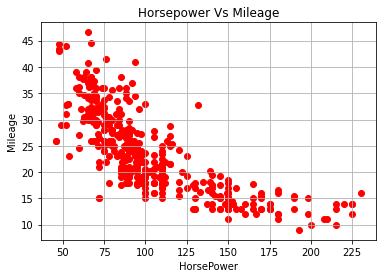

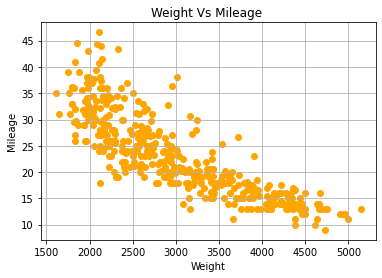

In [66]:
plt.scatter(car_df['horsepower'],car_df['mpg'],color='red')
plt.title('Horsepower Vs Mileage')
plt.xlabel('HorsePower')
plt.ylabel('Mileage')
plt.grid()
plt.show()

plt.scatter(car_df['weight'],car_df['mpg'],color='orange')
plt.title('Weight Vs Mileage ')
plt.xlabel('Weight')
plt.ylabel('Mileage')
plt.grid()
plt.show()

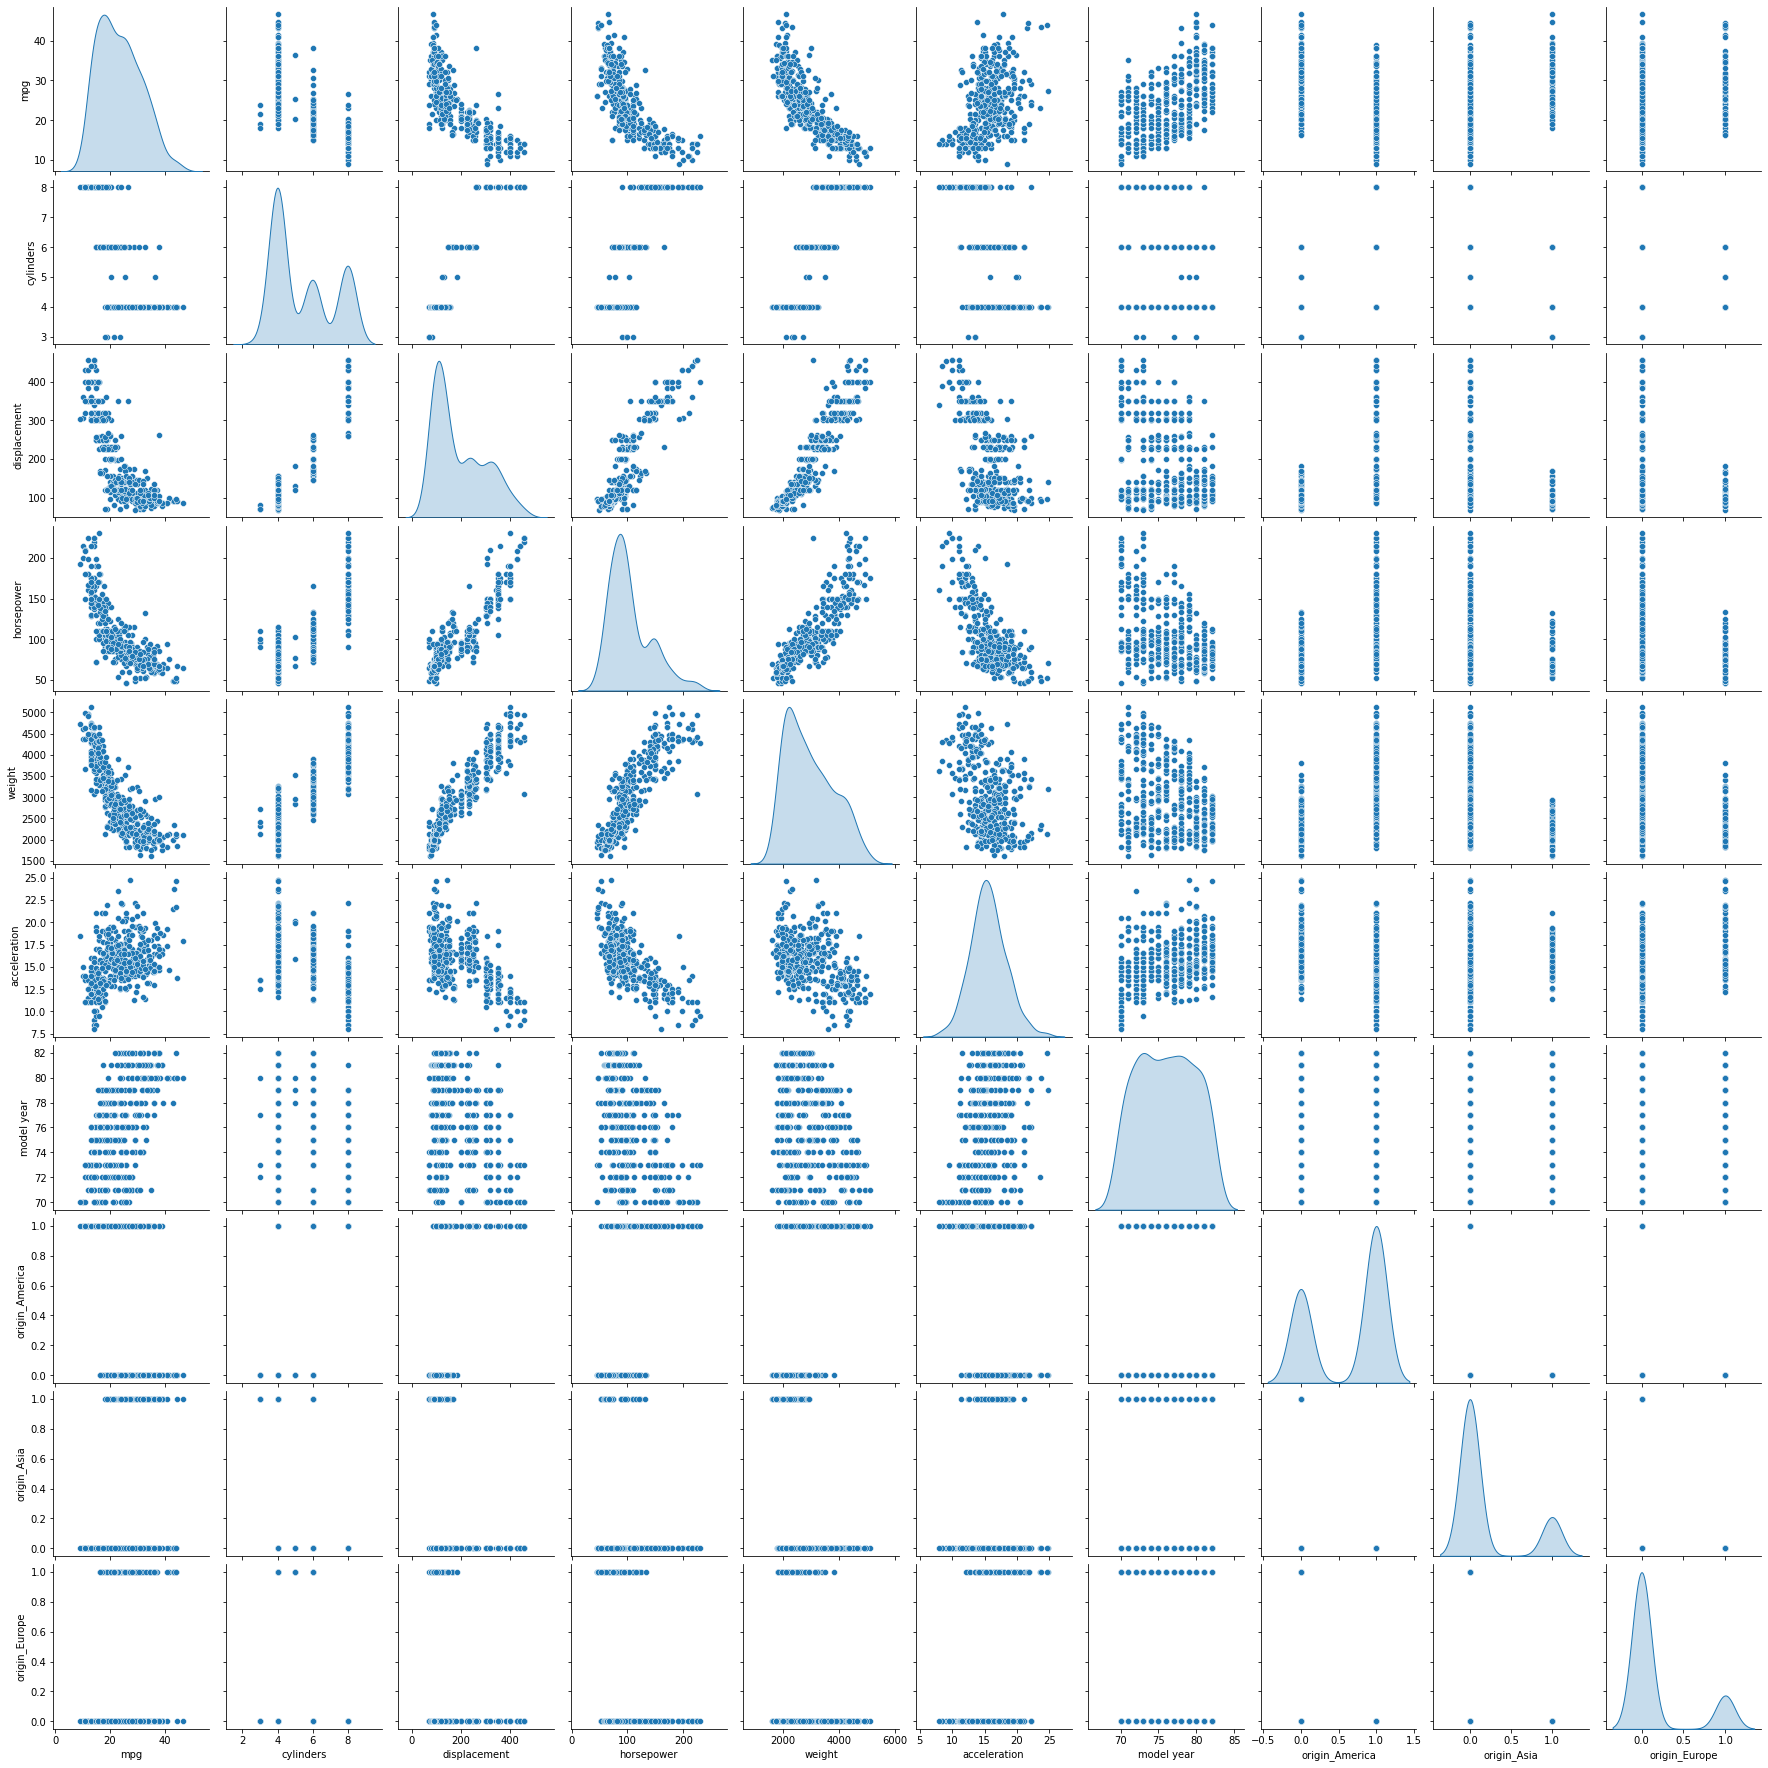

In [33]:
sns.pairplot(car_df,diag_kind='kde')
#using pairplot to check for association between the columns

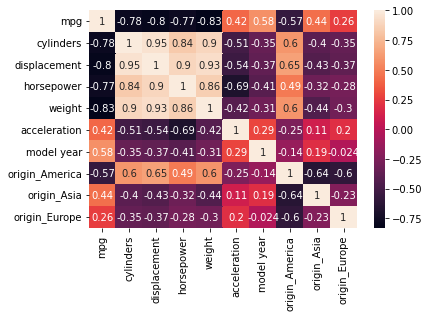

In [61]:
corre = car_df.corr()
sns.heatmap(corre,annot=True)

# From the pairplot above, mileage column association is curvilinear with respect to the attributes

# So we'll build both types of models : Linear Model & Curvilinear Model and check which fits best

## Splitting of the DataSet

In [34]:
x = car_df.drop(['mpg'],axis =1)
y = car_df[['mpg']]

In [35]:
x.shape,y.shape

((398, 9), (398, 1))

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
#using train_test_split to split data into train data and test data with 70:30 ratio

## Linear Model

In [43]:
reg_model = LinearRegression()
#building the linear model

In [44]:
reg_model.fit(X_train,Y_train)
#fitting the linear model

LinearRegression()

In [45]:
reg_model.score(X_train,Y_train)
#checking accuracy of model on train data

0.8141025501610559

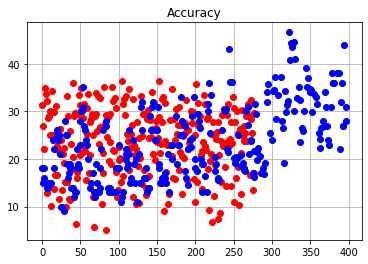

In [68]:
y_pred_train = reg_model.predict(X_train)
plt.plot(y_pred_train,marker='o',color='red',linestyle=' ')
plt.plot(Y_train,marker='o',color='blue',linestyle=' ')
plt.grid()
plt.title("Accuracy")
plt.show()

In [46]:
reg_model.score(X_test,Y_test)
#checking accuracy of model of test data

0.8433135132808827

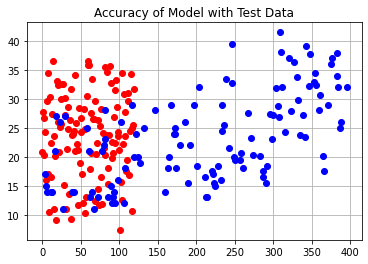

In [70]:
y_pred_test = reg_model.predict(X_test)
plt.plot(y_pred_test,marker='o',color='red',linestyle=' ')
plt.plot(Y_test,marker='o',color='blue',linestyle=' ')
plt.grid()
plt.title('Accuracy of Model with Test Data')
plt.show()

## Curvilinear Model

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
#importing packages related to curvilinear model

In [48]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
#setting the curve with degree 2 i.e quadratic curve

In [49]:
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
#transform the train and test data so that it could work with curvilinear model

In [50]:
poly_clf = linear_model.LinearRegression()
#building the model

In [51]:
poly_clf.fit(X_train2,Y_train)
#fitting the model with train data

LinearRegression()

In [53]:
poly_clf.score(X_train2,Y_train)
#checking accuracy with train data

0.8995492104963149

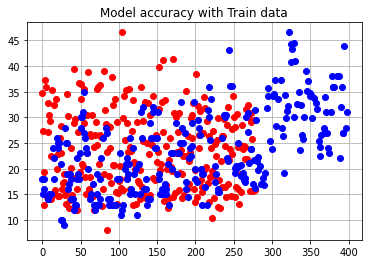

In [75]:
y_pred2_train = poly_clf.predict(X_train2)
plt.plot(y_pred2_train,marker='o',color='red',linestyle=' ')
plt.plot(Y_train,marker='o',color='blue',linestyle=' ')
plt.grid()
plt.title('Model accuracy with Train data')
plt.show()

In [54]:
poly_clf.score(X_test2,Y_test)
#checking accuracy with test data

0.8613490752804132

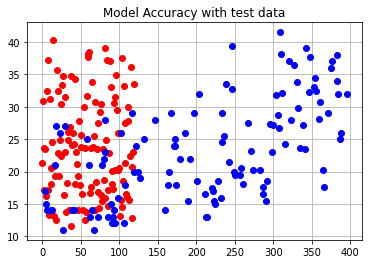

In [76]:
y_pred2_test = poly_clf.predict(X_test2)
plt.plot(y_pred2_test,marker='o',color='red',linestyle=' ')
plt.plot(Y_test,marker='o',color='blue',linestyle=' ')
plt.grid()
plt.title('Model Accuracy with test data')
plt.show()